(429, 640, 3)


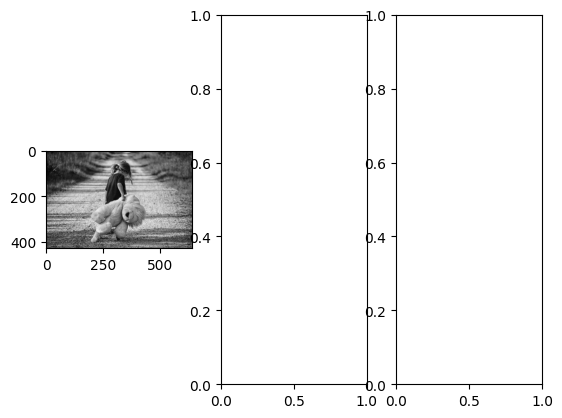

In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1) # 1x3 배열의 첫번째 칸
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ori_img = img.imread('images/girl.jpg') # real path -> D:\M.L\images\girl.jpg

ax1.imshow(ori_img)
print(ori_img.shape)

In [38]:
# Convolution -> API
# API -> 4차원(이미지 개수, 세로, 가로, 채널)
# (429, 640, 3) -> (1, 429, 640, 3) ※ Input Layer 에 맞춰서 3차원을 4차원으로 만듬.
input_image = ori_img.reshape((1,) + ori_img.shape) # ori_img.shape is tuple type. Add one that makes tuple type.
input_image = input_image.astype(np.float32) # 정수값 -> float 이유 : tesnorflow에서 float로 처리하기 때문에
print(input_image.shape)

ch1_input_image = input_image[:, :, :, 0:1] # slicing
print(ch1_input_image.shape) #(1, 429, 640, 1) 


(1, 429, 640, 3)
(1, 429, 640, 1)


In [61]:
filter = np.array([[[[-3]], [[0]], [[1]]], 
                   [[[-3]], [[2]], [[1]]],
                   [[[-3]], [[0]], [[1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_image,
    filter,
    strides = [1, 1, 1, 1], #이미지가 4차원이므로
    padding = 'VALID' # pading을 고려 X, 원래값으로
)
conv2d_result = conv2d.numpy()
print(conv2d_result.shape)

(3, 3, 1, 1)
(1, 427, 638, 1)


사이즈가 줄어듬.

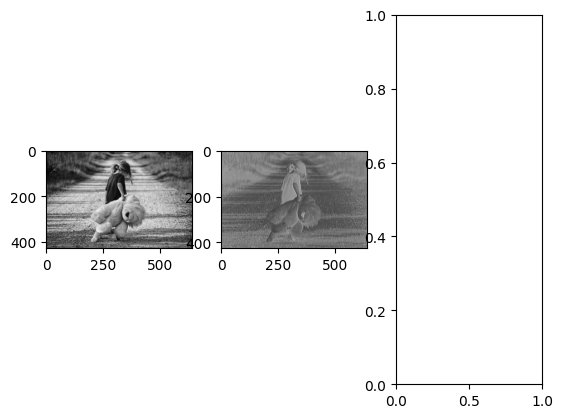

In [62]:
t_img = conv2d_result[0, :, :, :]
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1) # 1x3 배열의 첫번째 칸
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(ori_img)
ax2.imshow(t_img, cmap = 'gray')


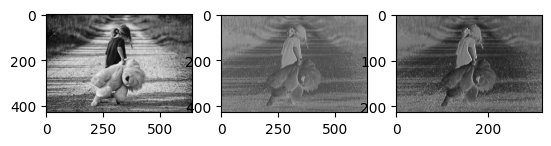

In [68]:
#pooling
pool = tf.nn.max_pool(
    conv2d_result,
    ksize = [1, 2, 2, 1],
    strides = 2,
    padding = 'VALID'
)
pool_result = pool.numpy()
t_img1 = pool_result[0, :, :, :]
fig = plt.figure()
ax1 = fig.add_subplot(1,3,1) # 1x3 배열의 첫번째 칸
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ax1.imshow(ori_img)
ax2.imshow(t_img, cmap = 'gray')
ax3.imshow(t_img1, cmap = 'gray')